In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1,figsize=(8, 6))
torch.manual_seed(1)

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())

In [3]:
x.shape

torch.Size([100, 1])

In [4]:
y.shape

torch.Size([100, 1])

In [5]:
# Torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

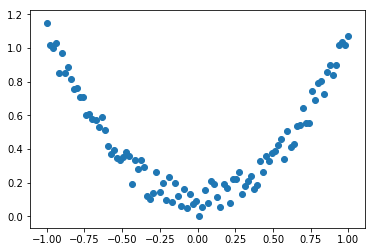

In [6]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [7]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # Hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output) # output layer
        
    def forward(self, x):
        x = F.relu(self.hidden(x)) # activation function for hidden layer
        x = self.predict(x)
        return x

In [8]:
net = Net(n_feature=1, n_hidden=10, n_output=1)           # define the network
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10)
  (predict): Linear(in_features=10, out_features=1)
)


In [22]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.25)
loss_func = torch.nn.MSELoss()    # This is for regression mean squared loss

In [23]:
plt.ion() # Turn interactive mode on

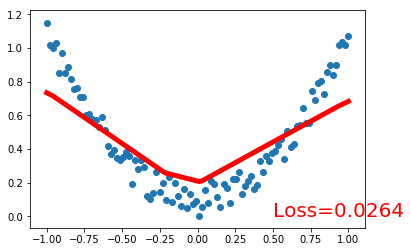

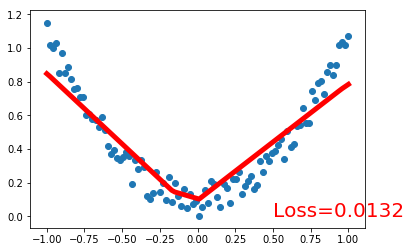

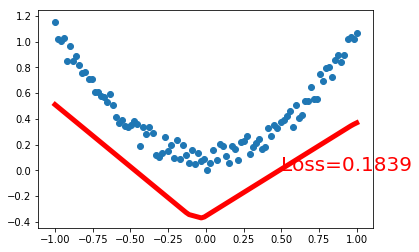

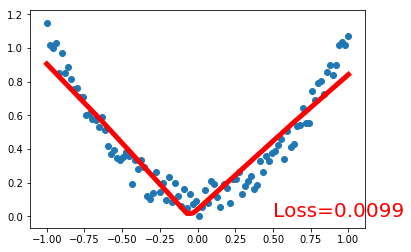

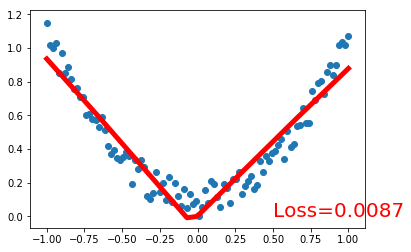

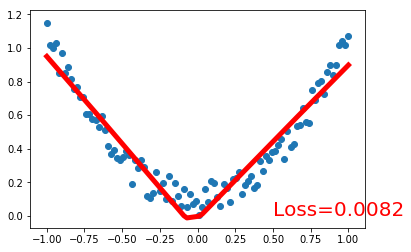

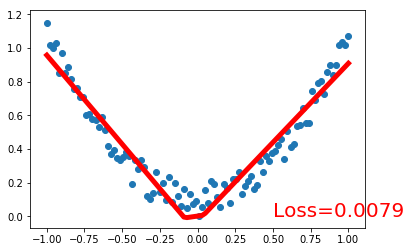

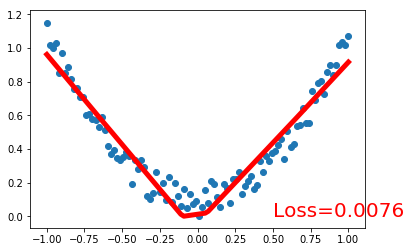

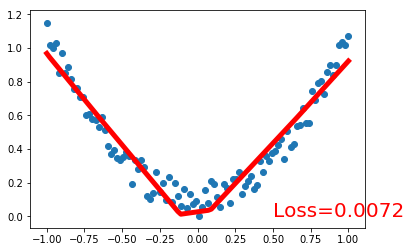

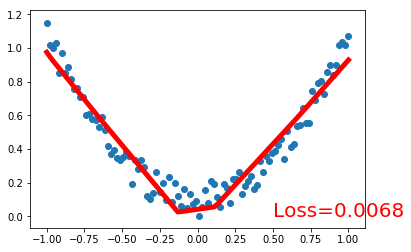

In [24]:
for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.2)

plt.ioff()